In [1]:
import numpy as np
import matplotlib.pyplot as plt


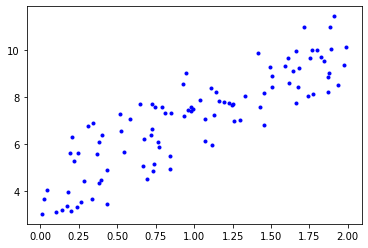

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.00636564],
       [3.04563552]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00636564],
       [10.09763668]])

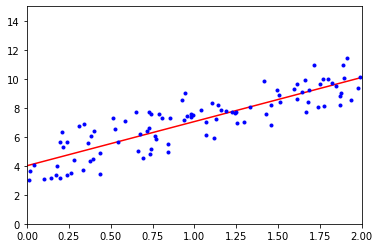

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00636564]), array([[3.04563552]]))

In [7]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.00636564],
       [3.04563552]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.00636564],
       [3.04563552]])